## Chemical Oscillations

Coupled first order differential equations can be used to model the kinematics of chemical reactions. The following sample chemical equation can be written as a rate equation: 
$$2A+B \longrightarrow 3B+C$$
where A,B and C are concentrations of different types of molecules. These concentrations follow the rate equations:
$$\frac{dA}{dt} = -kA^2B$$
$$\frac{dB}{dt} = kA^2B$$
$$\frac{dC}{dt} = kA^2B$$
where k is a factor determining the rate of the reactions.

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

In [9]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

The reactions that will be evaluated are the following equations:
$$A \longrightarrow X$$
$$B+X \longrightarrow Y+D$$
$$2X+Y \longrightarrow 3X$$
$$X \longrightarrow C$$


The corresponding rate equations are:
$$ \frac{dX}{dt} = A-(B+1)X+X^2Y$$
$$ \frac{dY}{dt} =  BX-X^2Y $$

### Steady state
The steady state can be found be equating both to zero.
$$ \frac{dX}{dt} = A-(B+1)X+X^2Y = 0$$
$$ \frac{dY}{dt} =  BX-X^2Y  = 0$$

$$\Rightarrow X(B-XY) = 0$$
$$\Rightarrow \begin{cases} X = 0\\ X = \frac{B}{Y}\\ \end{cases}$$

For $X=0$, 
$$\frac{dX}{dt}(0,Y) = A-(B-1)(0)+(0)^2Y $$
$$\Rightarrow A = 0$$

This is not true for when there is a concentration for $A$. 


For $X = \frac{B}{Y}$,
$$ \Rightarrow A-(B+1)\left(\frac{B}{Y}\right)+\frac{B^2}{A} = 0$$
$$ \Rightarrow A-\left(\frac{B}{Y}\right) = 0$$
$$ \Rightarrow Y = \frac{B}{A}$$

### Solving Numerically
These equations will be solved using a simple Euler algorithm.  

At t=0,
$$X(0) = 0$$
$$Y(0) = 0$$
A and B taken as constant and unity.
$$ \frac{dX}{dt} = 1-2X+X^2Y $$
$$ \frac{dY}{dt} =  X-X^2Y $$

$$\frac{d}{dt}\begin{pmatrix}X \\Y  \end{pmatrix} = \begin{pmatrix} 1-2X+X^2Y  \\ X-X^2Y \end{pmatrix}$$


In [10]:
# This defines the system of equations
def f(X, Y, A, B):
    F = np.array([ 1-2*X+(X**2)*Y, X-(X**2)*Y])
    return F 

def Euler(f, dt, t0, R0, A, B, imax):
    output = np.empty((imax, 3))
    i = 0
    ti = t0
    Ri = R0
    while i < imax:
        Ri = Ri + dt*f(Ri[0],Ri[1], A, B)
        ti+=dt
        output[i, 0] = ti
        output[i, 1] = Ri[0]
        output[i, 2] = Ri[1]
        i+=1
    return output

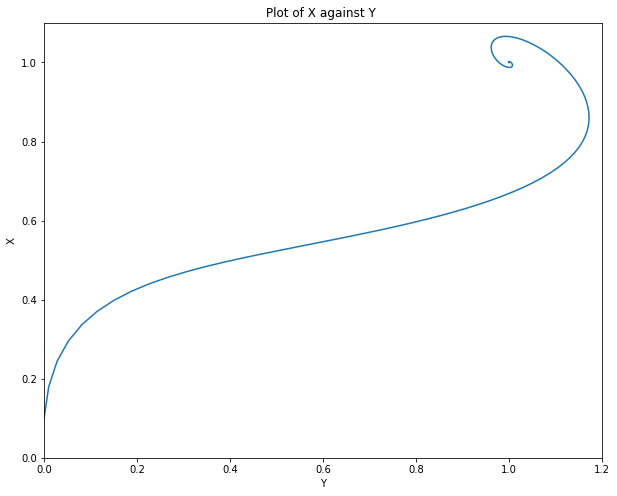

In [11]:
sol = Euler(f, 0.1, 0, [0,0], 1, 1 , 1000)
plt.figure(figsize=(10,8))
plt.plot(sol[:,2],sol[:,1])
plt.title('Plot of X against Y ')
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim(0,1.2)
plt.ylim(0,1.1);

### Varying Initial Conditions
Looking at how the equation changes with the initial concentrations of X and Y:
Let X = 0.2 and Y = 7

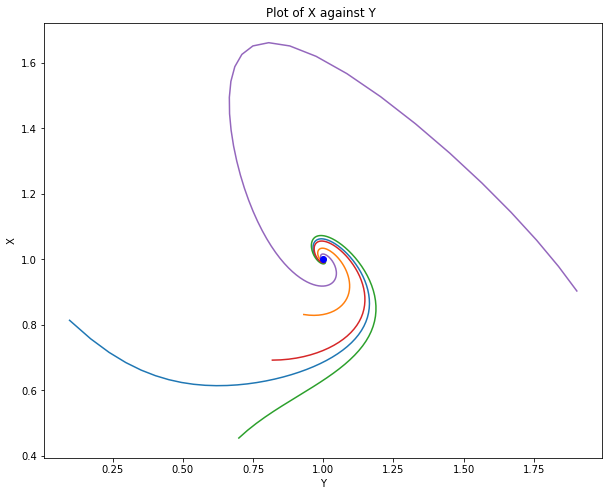

In [12]:
# 5 random initial values (X0,Y0)
x = np.random.rand(5,2)


# The 5 solutions for the 5 possible initial values
sol1 = Euler(f, 0.1, 0, [x[0,0],x[0,1]], 1, 1 , 1000)
sol2 = Euler(f, 0.1, 0, [x[1,0],x[1,1]], 1, 1 , 1000)
sol3 = Euler(f, 0.1, 0, [2*x[2,0],2*x[2,1]], 1, 1 , 1000)
sol4 = Euler(f, 0.1, 0, [2*x[3,0],x[3,1]], 1, 1 , 1000)
sol5 = Euler(f, 0.1, 0, [x[4,0],2*x[4,1]], 1, 1 , 1000)

plt.figure(figsize=(10,8))
plt.plot(sol1[:,2],sol1[:,1])
plt.plot(sol2[:,2],sol2[:,1])
plt.plot(sol3[:,2],sol3[:,1])
plt.plot(sol4[:,2],sol4[:,1])
plt.plot(sol5[:,2],sol5[:,1])
plt.plot(np.ones(1),np.ones(1),'bo')
plt.title('Plot of X against Y ')
plt.xlabel('Y')
plt.ylabel('X');

In [13]:
# Changing initial conditions for A and B
R1 = np.random.rand(2)
R2 = 3*np.random.rand(2)

# The 5 solutions for the 5 possible initial values
sol11 = Euler(f, 0.1, 0, [x[0,0],x[0,1]], R1[0], R1[1] , 1000)
sol21 = Euler(f, 0.1, 0, [x[1,0],x[1,1]], R1[0], R1[1] , 1000)
sol31 = Euler(f, 0.1, 0, [2*x[2,0],2*x[2,1]], R1[0], R1[1] , 1000)
sol41 = Euler(f, 0.1, 0, [2*x[3,0],x[3,1]], R1[0], R1[1] , 1000)
sol51 = Euler(f, 0.1, 0, [x[4,0],2*x[4,1]], R1[0], R1[1] , 1000)

sol12 = Euler(f, 0.1, 0, [x[0,0],x[0,1]], R2[0], R2[1] , 1000)
sol22 = Euler(f, 0.1, 0, [x[1,0],x[1,1]], R2[0], R2[1] , 1000)
sol32 = Euler(f, 0.1, 0, [2*x[2,0],2*x[2,1]], R2[0], R2[1] , 1000)
sol42 = Euler(f, 0.1, 0, [2*x[3,0],x[3,1]], R2[0], R2[1] , 1000)
sol52 = Euler(f, 0.1, 0, [x[4,0],2*x[4,1]], R2[0], R2[1] , 1000)

print(R1)
print(R2)

[0.06870465 0.69055676]
[2.51665866 2.59111121]


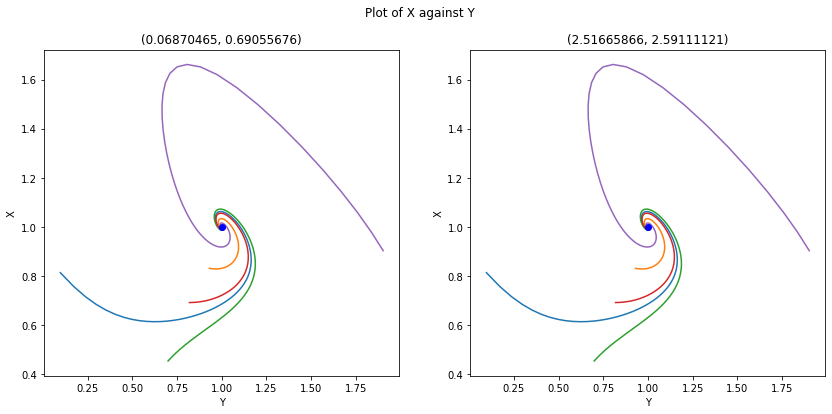

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))


fig.suptitle('Plot of X against Y ')
ax1.plot(sol11[:,2],sol11[:,1])
ax1.plot(sol21[:,2],sol21[:,1])
ax1.plot(sol31[:,2],sol31[:,1])
ax1.plot(sol41[:,2],sol41[:,1])
ax1.plot(sol51[:,2],sol51[:,1])
ax1.plot(np.ones(1),np.ones(1),'bo')

ax2.plot(sol12[:,2],sol12[:,1])
ax2.plot(sol22[:,2],sol22[:,1])
ax2.plot(sol32[:,2],sol32[:,1])
ax2.plot(sol42[:,2],sol42[:,1])
ax2.plot(sol52[:,2],sol52[:,1])
ax2.plot(np.ones(1),np.ones(1),'bo')

ax1.set_title('(0.06870465, 0.69055676)')
ax2.set_title('(2.51665866, 2.59111121)')
ax1.set_xlabel('Y')
ax2.set_xlabel('Y')
ax1.set_ylabel('X')
ax2.set_ylabel('X');

### Results
For all concentrations for X and Y, the concentrations of X and Y appear to always stabilise at 1 as t $\longrightarrow 100$. 

In [ ]:
print